# Homework 5: Group 1
#### Regularization

David Jung, Ryan Voges, Emily Blake, Spencer Powell, Abraham Alhomadi

- Linear regression:        RMSE_test = 0.9
- Ridge regression:         RMSE_test = 0.9
- Lasso regression:         RMSE_test = 0.9
- ElasticNet regression:  RMSE_test = 0.9

In this exercise I want you to apply penalized regression models to the wage data set which is available on the GitHub folder for HW5. Import the wage_regularization.csv as a data frame and call it df. I specifically want you to do the followings:

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set() 
import warnings
warnings.filterwarnings('ignore')

In [15]:
rand_state= 1000

In [16]:
df = pd.read_csv('wage_regularization.csv')

In [19]:
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.0,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.0,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.0,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.0,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.0,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


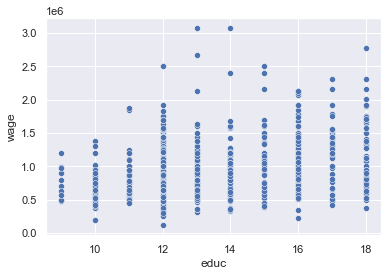

In [21]:
sns.scatterplot(x='educ', y='wage', data=df)
plt.show()

1. Standardize all the variables using StandarScaler() class from sklearn package.
With the standardized variables, make a new data frame and call it df sc.

In [22]:
from sklearn.preprocessing import StandardScaler as ss

In [23]:
scaler=ss()
df_ss= scaler.fit_transform(df)
df_ss[0]

array([-0.46751952, -0.66885143, -0.681389  , -0.68346491, -0.67711629,
       -0.66426779, -0.66971009, -0.69120265, -0.70895446, -0.72303072,
       -0.73357606])

In [24]:
df.describe()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
count,9.350000e+02,935.000000,935.000000,935.000000,935.000000,9.350000e+02,935.000000,935.000000,935.00000,9.350000e+02,9.350000e+02
mean,9.579455e+05,13.468449,186.219251,2643.720856,38516.721925,5.751197e+05,33.080214,1103.948663,37160.73369,1.261474e+06,4.317175e+07
std,4.043608e+05,2.196654,61.993732,1340.538368,26273.534179,4.914620e+05,3.107803,206.922193,10400.77792,4.676613e+05,1.983487e+07
min,1.150000e+05,9.000000,81.000000,729.000000,6561.000000,5.904900e+04,28.000000,784.000000,21952.00000,6.146560e+05,1.721037e+07
25%,6.690000e+05,12.000000,144.000000,1728.000000,20736.000000,2.488320e+05,30.000000,900.000000,27000.00000,8.100000e+05,2.430000e+07
50%,9.050000e+05,12.000000,144.000000,1728.000000,20736.000000,2.488320e+05,33.000000,1089.000000,35937.00000,1.185921e+06,3.913539e+07
75%,1.160000e+06,16.000000,256.000000,4096.000000,65536.000000,1.048576e+06,36.000000,1296.000000,46656.00000,1.679616e+06,6.046618e+07
max,3.078000e+06,18.000000,324.000000,5832.000000,104976.000000,1.889568e+06,38.000000,1444.000000,54872.00000,2.085136e+06,7.923517e+07


In [25]:
df.columns

Index(['wage', 'educ', 'educ2', 'educ3', 'educ4', 'educ5', 'age', 'age2',
       'age3', 'age4', 'age5'],
      dtype='object')

In [26]:
df_ss =pd.DataFrame(df_ss, columns=df.columns)
df_ss.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,-0.467520,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576
1,-0.371019,2.064038,2.223684,2.379630,2.530868,2.675999,1.261947,1.281608,1.297931,1.310810,1.320211
2,-0.328955,0.242112,0.157854,0.074845,-0.003836,-0.075928,-0.025824,-0.072282,-0.117721,-0.161641,-0.203607
3,-0.761969,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.347767,-0.386577,-0.422573,-0.455483,-0.485129
4,-0.979713,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,0.296119,0.251685,0.206178,0.160164,0.114187


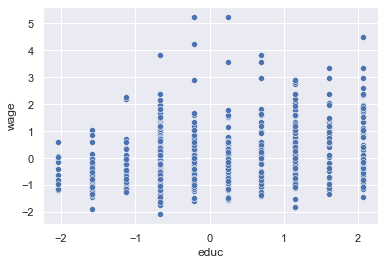

In [27]:
sns.scatterplot(x='educ',y='wage', data=df_ss)
plt.show()

2. Define your feature space and target variables and then split the data into test
(20%) and train set (80%)

In [30]:
y = df_ss['wage']
X = df_ss.drop('wage', axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
932,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-1.635539,-1.547054,-1.463051,-1.383830,-1.309577
82,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,1.261947,1.281608,1.297931,1.310810,1.320211
370,1.608556,1.658809,1.693718,1.713830,1.719745,1.583890,1.644257,1.703790,1.762179,1.819156
452,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,0.940004,0.928630,0.913427,0.894592,0.872387
132,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576


3. As a benchmark, use sm.OLS() function from statsmodel.api package to run the
linear regression model on the train set. (10 points)
    1. Report the summary output. (5 points)
    2. From the summary report, What is the R2 of the model in train set?(3 points)
    3. Are any of the features statistically signicant at 5% level? (2 points)

In [32]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [33]:
model = sm.OLS(y_train, X_train_wc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     10.81
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           2.83e-17
Time:                        12:55:33   Log-Likelihood:                -1016.0
No. Observations:                 748   AIC:                             2054.
Df Residuals:                     737   BIC:                             2105.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.035     -0.080      0.937      -0.071       0.065
educ        -109.9917    192.003     -0.573      0.567    -486.931     266.947
educ2        462.5622    824.114      0.561      0.575   -1155.328    2080.452
educ3       -736.3809   1339.181     -0.550      0.583   -3365.445    1892.684
educ4        527.4761    974.843      0.541      0.589   -1386.323    2441.276
educ5       -143.4145    267.848     -0.535      0.593    -669.250     382.421
age        -1295.3370   4397.692     -0.295      0.768   -9928.834    7338.160
age2        5164.4620   1.79e+04      0.289      0.773   -2.99e+04    4.03e+04
age3       -7783.0117   2.73e+04     -0.285      0.776   -6.15e+04    4.59e+04
age4        5255.0538   1.87e+04      0.282      0.778   -3.14e+04    4.19e+04
age5       -1341.0610   4794.082     -0.280      0.780   -1.08e+04    8070.622
==============================================================================
Omnibus:                      202.208   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.255
Skew:                           1.286   Prob(JB):                    1.40e-142
Kurtosis:                       6.787   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

B. The $R^2$ for the train set is .128

C. None of the variable are statistically significant

4. From sklearn.linear model import the relevant functions for Linear Regression,
Ridge, Lasso and ElasticNet regression functions. Do the followings: (25 points)
    1. Train all the 4 models with the default features. (5 points)
    2. Save the predicted values for the test set in y hat linear, y hat ridge, y hat lasso
and y hat net. (5 points)
    3. Construct a data frame named df predictions with 5 columns. y test, and the
four y hats from previous part (5 points)
    4. Estimate the coeficients from each model and stack them all along with the
feature names in a new data frame named coeficients. (5 points)
    5. Why do you think all the coeficients of Lasso and ElasticNet models are
zero? (5 points)

In [35]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [36]:
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_enet = ElasticNet()

In [37]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_enet.fit(X_train, y_train).predict(X_test)

In [38]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_enet':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_enet
434,0.042199,-0.267170,-0.202696,-0.012852,-0.012852
238,1.910343,0.699718,0.704007,-0.012852,-0.012852
531,-0.700110,-0.065042,0.045579,-0.012852,-0.012852
157,2.328510,0.689508,0.653410,-0.012852,-0.012852
601,1.341239,0.208652,0.171149,-0.012852,-0.012852


In [39]:
coefficients = pd.DataFrame({'Features':df.drop('wage', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_enet']= model_enet.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_enet
0,educ,-109.991745,0.169172,0.0,0.0
1,educ2,462.562174,0.309854,0.0,0.0
2,educ3,-736.380870,0.232209,0.0,0.0
3,educ4,527.476085,-0.016857,0.0,0.0
4,educ5,-143.414487,-0.393124,0.0,0.0
5,age,-1295.337040,0.005242,0.0,0.0
6,age2,5164.461994,0.136966,0.0,0.0
7,age3,-7783.011668,0.147814,0.0,0.0
8,age4,5255.053781,0.043936,0.0,0.0
9,age5,-1341.061044,-0.166490,0.0,0.0


5. Use cross validation to find the optimal hyper parameters (alphas) for the penalized regression models. Save these optimal alphas in a new object. you need to use them in next part.

In [45]:
ridge_cv= RidgeCV()
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_
alpha_ridge_opt = ridge_cv.alpha_
alpha_ridge_opt

10.0

In [46]:
lasso_cv = LassoCV()
lasso_cv.fit(X_train, y_train)
alpha_lasso_opt = lasso_cv.alpha_
alpha_lasso_opt

0.010732138475800224

In [47]:
e_net_cv = ElasticNetCV()
e_net_cv.fit(X_train, y_train)
alpha_net_opt = e_net_cv.alpha_
alpha_net_opt

0.010682821217946607

6. Now go back to part 4, copy codes from cells in part 4.1, 4.2 and 4.3. You need to refit the models using the optimal hyper parameters (alphas) that you obtained
from cross validation in part 5. However, name your final predictions data frame
as df predictions optimal

In [52]:
model_linear = LinearRegression()
model_ridge_opt = Ridge(alpha_ridge_opt)
model_lasso_opt = Lasso(alpha_lasso_opt)
model_enet_opt = ElasticNet(alpha_net_opt)

In [53]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge_opt = model_ridge_opt.fit(X_train, y_train).predict(X_test)
y_hat_lasso_opt = model_lasso_opt.fit(X_train, y_train).predict(X_test)
y_hat_net_opt = model_enet_opt.fit(X_train, y_train).predict(X_test)

In [55]:
df_predictions_opt = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge_opt,
                               'y_hat_lasso':y_hat_lasso_opt,
                               'y_hat_enet':y_hat_net_opt})
df_predictions_opt.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_enet
434,0.042199,-0.267170,-0.207593,-0.213254,-0.214806
238,1.910343,0.699718,0.755765,0.808387,0.809270
531,-0.700110,-0.065042,0.052495,0.023871,0.037489
157,2.328510,0.689508,0.700613,0.761422,0.757606
601,1.341239,0.208652,0.165839,0.155527,0.158446


In [57]:
coefficients_opt = pd.DataFrame({'Features':df.drop('wage', axis=1, inplace=False).columns})
coefficients_opt['model_lin']= model_linear.coef_
coefficients_opt['model_ridge']= model_ridge_opt.coef_
coefficients_opt['model_lasso']= model_lasso_opt.coef_
coefficients_opt['model_enet']= model_enet_opt.coef_
coefficients_opt

,Features,model_lin,model_ridge,model_lasso,model_enet
0,educ,-109.991745,0.269341,0.304250,0.331947
1,educ2,462.562174,0.182650,0.000000,0.000000
2,educ3,-736.380870,0.075270,0.000000,0.000000
3,educ4,527.476085,-0.046356,0.000000,-0.000000
4,educ5,-143.414487,-0.176467,-0.000000,-0.024823
5,age,-1295.337040,0.069375,0.145802,0.079775
6,age2,5164.461994,0.062592,0.000071,0.063142
7,age3,-7783.011668,0.043804,0.000000,0.009603
8,age4,5255.053781,0.013791,0.000000,0.000000
9,age5,-1341.061044,-0.026484,0.000000,0.000000


7. Use the variables in df predictions optimal to report the RMSE test (RMSE in
the test set) for all the four models. Rank the models based on their performance
in the test set. Were you able to beat the simple linear model? What does this
mean?

In [58]:
MSE_test = np.mean(np.square(df_predictions_opt['y_test'] - df_predictions_opt['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.865

In [59]:
MSE_test = np.mean(np.square(df_predictions_opt['y_test'] - df_predictions_opt['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.867

In [60]:
MSE_test = np.mean(np.square(df_predictions_opt['y_test'] - df_predictions_opt['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.868

In [62]:
MSE_test = np.mean(np.square(df_predictions_opt['y_test'] - df_predictions_opt['y_hat_enet']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.868

8. Plot the coeficients vs alphas for each of the penalized regression models. How
do you interpret each of them? You can use this range for all the models:

alphas = 10**np.linspace(-4,2,100)

### Ridge regression

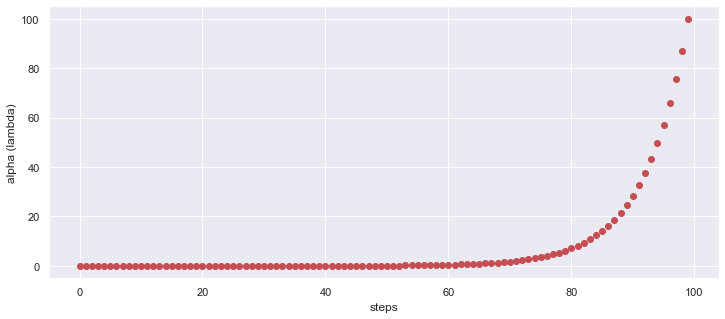

In [63]:
alpha_ridge = 10**np.linspace(-4,2,100)
plt.figure(figsize=(12,5))
plt.plot(alpha_ridge,'or' )
plt.xlabel('steps')
plt.ylabel('alpha (lambda)')
plt.show()

In [65]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 10)

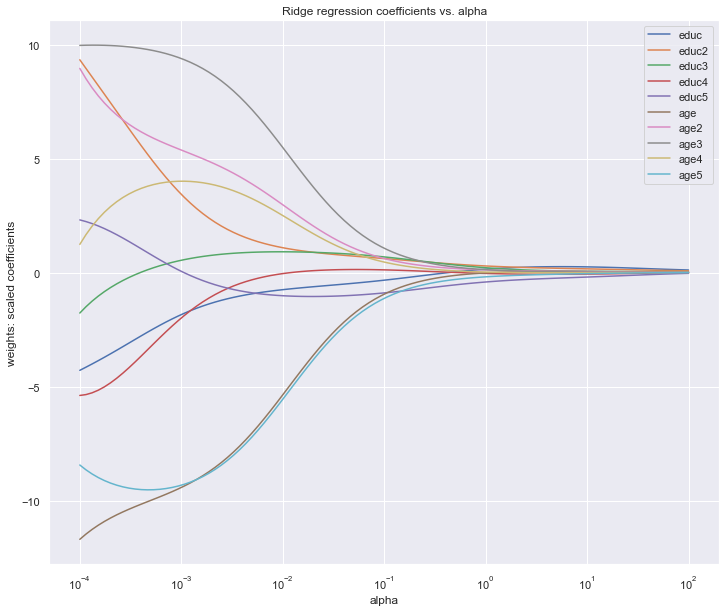

In [66]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

### Lasso Regression

In [69]:
alpha_lasso = 10**np.linspace(-4,2,100)

In [70]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 10)

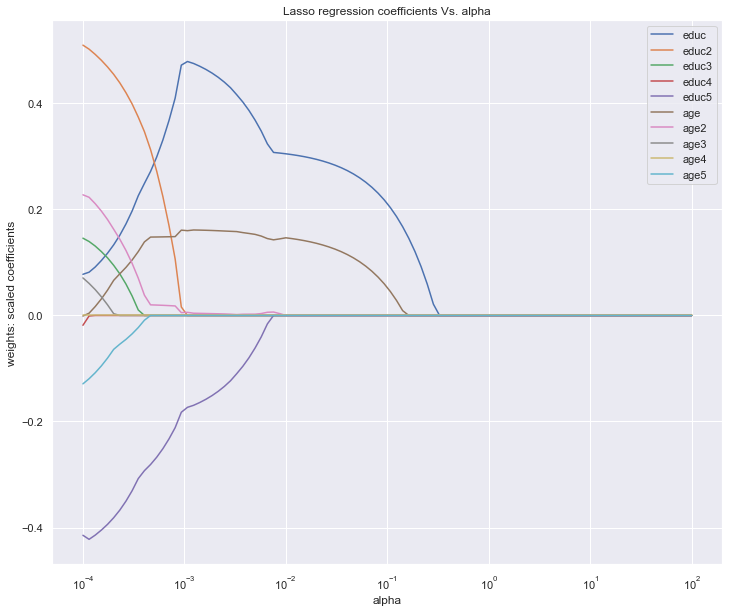

In [71]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

### Elastic Net

In [73]:
alpha_elasticnet = 10**np.linspace(-4,2,100)

In [74]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 10)

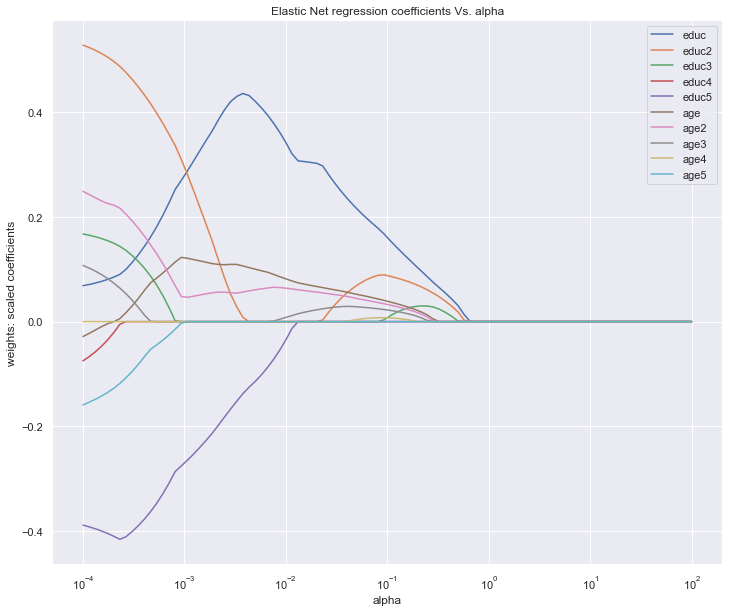

In [75]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

9. From the 3 plots you generated in part 8, answer the following questions:

    1. Ridge regression plot: Which coeficients drop most significantly when alpha increases from 0.0001 to 10. (name the top two) (5 points)
    2. Lasso regression plot: What are the top 2 variables that survive when alpha=0.1? (5 points)
    3.From the Lasso plot and ElasticNet plot, why the magnitude of Lasso coeficients are larger than the ElasticNet coeficients for alpha=0.0001?

1. Age and age^3 dropped the most significantly between 0.0001 to 10

2. The top two survivors when alpha=0.1 are educ and age

3. In Elastic Net, we use Gradient Descent to find our unique solutions. The magnitude is also higher in Lasso regression because it automatically cuts out "insignificant" variables. Elastic Net, on the other hand, eliminates only some weights while simply reducing the magnitude of others. 